# Predicting Churn in Telecommunication Customers
## Phase 1: Data Preparation & Visualisation

#### By Harold Davies

## Table of Contents
* [Introduction](#intro)
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
  + [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
  + [Irrelevant features](#Irrelevant-features)
  + [Column titles](#Column-titles)
  + [Data types](#Data-types)
  + [Missing values](#Missing-values)
  + [Inconsistencies](#Inconsistencies)
  + [Revisiting irrelevant features](#Revisiting-irrelevant-features)
* [Data Exploration and Visualization](#Data-Exploration-and-Visualization)
  + [Univariate plots](#Univariate-plots)
  + [Bivariate plots](#Bivariate-plots)
  + [Multivariate plots](#Multivariate-plots)
* [Literature Review](#Literature-Review)
* [Summary and Conclusions](#Summary-and-Conclusions)
* [References](#References)


## Introduction <a id='intro'></a>

### Dataset Source

The telecommunication customer churn dataset for this project was originally provided by the CrowdAnalytix Community for a churn prediction competition held in 2012 (CrowdAnalytix, 2012). The dataset is no longer available via their website and was sourced from a github repository (Kumar, 2019). The dataset contains features which capture customer information from an anonymised telecom company. 

### Dataset Details

The dataset is about North American customers of the un-named telecom company, it contains mostly customer usage patterns (Umayaparvathi & Iyakutti, 2016) as well as their area code, phone number, state and whether on not they churn. The original dataset from CrowdAnalytix contained 21 features, however four features have been removed from the dataset on GitHub and I will also remove phone number.

The dataset contains 16 features (excluding phone number) and 3,333 individual customers. 

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import random

random.seed(44)
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
url = "https://github.com/naveen-marthala/Telecom-Churn-Analysis-and-Prediction/raw/master/data/telecom%20churn(original_data).csv"
#retrieve csv file
response = requests.get(url)
#save csv as pandas dataframe
df_churn = pd.read_csv(StringIO(response.text))
#remove phone numbers - info is private
df_churn.drop(columns=['phone number'], inplace=True)
#randomly display 10 rows
df_churn.sample(10)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
675,LA,43,415,no,no,0.0,101.0,41.12,121.0,11.00,104.0,11.92,3.0,1.59,1.0,False
1846,NH,120,510,no,yes,43.0,117.0,30.24,70.0,14.88,117.0,7.26,4.0,3.11,1.0,False
1433,MI,79,510,no,no,0.0,107.0,37.55,97.0,16.34,74.0,7.25,2.0,3.29,1.0,False
2304,OK,93,415,no,yes,32.0,120.0,19.87,97.0,19.75,112.0,5.75,9.0,2.97,0.0,False
338,OR,77,510,no,no,0.0,104.0,39.75,94.0,22.65,104.0,9.57,3.0,2.05,2.0,False
780,MS,107,510,yes,no,0.0,104.0,46.50,68.0,15.62,67.0,6.92,9.0,2.97,2.0,False
387,NH,54,510,no,no,0.0,102.0,35.79,83.0,17.38,53.0,5.75,5.0,2.30,1.0,False
3065,MA,122,408,no,yes,29.0,83.0,33.22,93.0,22.80,95.0,7.56,6.0,2.27,3.0,False
1742,HI,79,415,no,no,0.0,124.0,7.12,95.0,17.94,55.0,10.71,5.0,3.08,1.0,False
940,DE,117,415,no,no,0.0,137.0,28.70,107.0,20.52,106.0,9.22,4.0,4.19,0.0,False


In [3]:
df_churn.shape

(3333, 16)

### Dataset Features

Below are the features from the dataset being used for this report, descriptions are provided by CrowdAnalytix (CrowdAnalytix, 2012). 

| **Feature Name**         | **Data Type** | **Units** | **Description**                         |
|:-------------------------|:-------------:|:---------:|:---------------------------------------|
| Account length           | Numeric       | days      | Account length in days                 |
| International plan       | Binary        | NA        | Had international plan or not          |
| Voice mail plan          | Binary        | NA        | Had voice mail plan or not             |
| Number vmail messages    | Numeric       | NA        | Number of voice mail messages a person made |
| Total day calls          | Numeric       | NA        | Day calls made                         |
| Total day charge         | Numeric       | USD       | Total day charge                      |
| Total eve calls          | Numeric       | NA        | Total evening calls                   |
| Total eve charge         | Numeric       | USD       | Total evening charge                  |
| Total night calls        | Numeric       | NA        | Total night calls                     |
| Total night charge       | Numeric       | USD       | Total night charge                    |
| Total intl calls         | Numeric       | NA        | Total international calls made         |
| Total intl charge        | Numeric       | USD       | Total international charge            |
| Customer service calls   | Numeric       | NA        | Number of customer service calls made |

### Target Feature

The target feature in the dataset is Churn. Churn is a binary feature representing whether or not the customer churned from the telecom company. Churn is True if the customer left and False if the customer remained with the company. The dataset contains 2850 (85.5%) churners and 483 (14.5%) non-churners. 

## Goals and Objectives

In a broader business sense, churn is defined as the percentage of customers who leave a particular service provider during a given year. Churn is an incredibly significant metric to businesses, including telecom companies, as lower churn results in a longer customer lifetime (Churnzero, n.d.), meaning on average customers contribute more revenue to the company. Reducing churn makes customers more valuable to a business, in turn justifying a higher customer acquisition cost and enabling more aggressive customer expansion. The telecommunication industry in particular has become highly competitive, making customer expansion more difficult and customer retention even more valuable. 

If a customer can be identified as being at a high risk of churning, before they switch away from the service provider, retaining that customer, is comparatively cheaper (in some cases by 20x) than the cost to acquire a new customer (Ahmad, Jafar, Aljoumaa, & Customer, 2019) (Vafeiadis, Diamantaras, Sarigiannidis, & Chatzisavvas, 2015). Therefore, a model for predicting which customers are likely to churn, before they do, is incredibly valuable to a telecom company. 

The goal of this project is (a) to predict which customers are going to churn, based on the customer usage patterns provided by CrowdAnalytix, (b) determine which model is best suited for making this prediction and (c) thoroughly preprocess and explore the dataset provided by CrowdAnalytix. Four different models will be tuned and evaluated against the objective of maximising recall. Due to the relatively low cost of retaining customers compared to acquiring them, identifying all customers likely to churn (true positives) is being considered more important than not identifying non-churners as being at high risk of churning (false positives). 

## Data Cleaning and Preprocessing

### Data Cleaning & Preprocessing Steps

*   Drop irrelevant features
*   Check and modify column names as necessary
*   Check and fix data types
*   Check for and deal with missing values
*   Check for inconsistent values
*   Revisit irrelevant features

### Irrelevant features

The state and area code of the customer is not meaningful information for the models, so we will remove them. 

In [4]:
df_churn.drop(columns=['area code', 'state'], inplace=True)

### Column titles

I can inspect the column names and check the data types at the same time here. 

In [5]:
df_churn.dtypes

account length              int64
international plan         object
voice mail plan            object
number vmail messages     float64
total day calls           float64
total day charge          float64
total eve calls           float64
total eve charge          float64
total night calls         float64
total night charge        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
churn                        bool
dtype: object

We will rename the columns to remove spaces, abbreviate where possible and use more descriptive titles.

In [6]:
new_column_names = {
    'account length': 'account_age',
    'international plan': 'intl_plan',
    'voice mail plan': 'voice_mail_plan',
    'number vmail messages': 'n_voice_mails',
    'total day calls': 'n_day_calls',
    'total day charge': 'sum_day_charges',
    'total eve calls': 'n_evening_calls',
    'total eve charge': 'sum_evening_charges',
    'total night calls': 'n_night_calls',
    'total night charge': 'sum_night_charges',
    'total intl calls': 'n_intl_calls',
    'total intl charge': 'sum_intl_charges',
    'customer service calls': 'n_customer_service_calls',
    'churn': 'churn'
}
df_churn = df_churn.rename(columns=new_column_names)

### Data types

The columns intl_plan and voice_mail_plan are binary variables, but they are stored as 'yes' or 'no' objects, so these will be swapped for 1 (true) or 0 (false). It is also worth checking there are not any other values besides yes or no. My target variable is also stored as a boolean with true/false values. Whilst this will work for scikit-learn, using 0/1 integer values is preferred to align with convention, so we will adjust these as well.

In [7]:
df_churn['intl_plan'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
df_churn['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
df_churn.replace({'yes': 1, 'no': 0}, inplace=True)

In [10]:
df_churn[['intl_plan', 'voice_mail_plan']].dtypes

intl_plan          int64
voice_mail_plan    int64
dtype: object

In [11]:
df_churn.replace({True: 1, False: 0}, inplace=True)

In [12]:
df_churn.dtypes

account_age                   int64
intl_plan                     int64
voice_mail_plan               int64
n_voice_mails               float64
n_day_calls                 float64
sum_day_charges             float64
n_evening_calls             float64
sum_evening_charges         float64
n_night_calls               float64
sum_night_charges           float64
n_intl_calls                float64
sum_intl_charges            float64
n_customer_service_calls    float64
churn                         int64
dtype: object

### Missing values

In [13]:
#check how many values are missing in each column
df_churn.isna().sum()

account_age                 0
intl_plan                   0
voice_mail_plan             0
n_voice_mails               1
n_day_calls                 2
sum_day_charges             3
n_evening_calls             2
sum_evening_charges         4
n_night_calls               3
sum_night_charges           1
n_intl_calls                2
sum_intl_charges            3
n_customer_service_calls    1
churn                       0
dtype: int64

In [14]:
#see how many rows in total have missing values
df_churn.isna().any(axis=1).sum()

18

Considering that there are 3333 rows, 18 is not a significant number of rows, and dropping these columns won't meaningfully impact the models. 18 is also a reasonable number to manually eyeball to identify any patterns which would allow the missing values to be populated, so I will have a look at them. 

In [15]:
df_churn[df_churn.isna().any(axis=1)]

,account_age,intl_plan,voice_mail_plan,n_voice_mails,n_day_calls,sum_day_charges,n_evening_calls,sum_evening_charges,n_night_calls,sum_night_charges,n_intl_calls,sum_intl_charges,n_customer_service_calls,churn
6,121,0,1,24.0,88.0,37.09,NaN,29.62,118.0,9.57,7.0,2.03,3.0,0
10,65,0,0,0.0,137.0,NaN,83.0,19.42,111.0,9.40,6.0,NaN,4.0,1
14,62,0,0,0.0,70.0,20.52,76.0,26.11,NaN,9.14,6.0,3.54,4.0,0
17,93,0,0,0.0,114.0,32.42,111.0,18.55,121.0,5.83,3.0,NaN,3.0,0
23,111,0,0,0.0,103.0,18.77,102.0,NaN,105.0,8.53,NaN,2.08,2.0,0
29,49,0,0,0.0,NaN,20.28,109.0,18.28,90.0,8.04,1.0,3.00,1.0,0
34,57,0,1,25.0,94.0,NaN,75.0,16.58,116.0,9.61,4.0,2.24,0.0,0
41,135,1,1,41.0,85.0,29.43,107.0,NaN,78.0,5.50,15.0,3.94,0.0,1
45,59,0,1,28.0,97.0,20.55,NaN,18.11,116.0,7.34,5.0,2.30,2.0,0
54,87,0,0,0.0,83.0,25.67,116.0,18.67,127.0,9.18,3.0,NaN,5.0,1


In [16]:
#check how many customers who do not have a voice mail plan, coincide with each unique value of number of voicemails
df_churn[df_churn['voice_mail_plan'] == 0].groupby('n_voice_mails').size()

n_voice_mails
0.0    2410
dtype: int64

As would be logical, all of the customers with no voicemail plan have no voicemail messages, so the missing value in row 78 can be populated with 0. Besides that there is no way to know for sure what the missing values are, so it will be best to remove those rows. 

In [17]:
df_churn.iloc[78]['n_voice_mails'] = 0.0
df_churn = df_churn.dropna()

In [18]:
#confirming I removed 17 rows
df_churn.shape

(3315, 14)

### Inconsistencies

As we saw earlier, all customers who have no voicemail plan also have 0 voicemail messages. Another relationship worth checking is that customers with no international plan have no international calls.

In [19]:
df_churn[df_churn['intl_plan'] == False].groupby('n_intl_calls').size()

n_intl_calls
0.0      18
1.0     146
2.0     442
3.0     591
4.0     555
5.0     438
6.0     299
7.0     192
8.0     105
9.0      95
10.0     43
11.0     26
12.0     14
13.0     12
14.0      6
15.0      5
16.0      2
17.0      1
18.0      3
19.0      1
dtype: int64

It seems that this relationship does not hold true, so there is no potential for inconsistencies here. This may be an interesting phenomon to explore later with visualisations. 

In [20]:
df_churn.describe()

,account_age,intl_plan,voice_mail_plan,n_voice_mails,n_day_calls,sum_day_charges,n_evening_calls,sum_evening_charges,n_night_calls,sum_night_charges,n_intl_calls,sum_intl_charges,n_customer_service_calls,churn
count,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,101.108597,0.096833,0.276621,8.101056,100.459729,30.564591,100.109804,17.075086,100.077225,9.041931,4.475415,2.764992,1.558673,0.143891
std,39.847472,0.295774,0.447395,13.692074,20.070000,9.266644,19.916649,4.309738,19.586370,2.277571,2.457775,0.753966,1.313472,0.351033
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.155000,87.000000,7.520000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.090000,100.000000,9.050000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,114.000000,36.805000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,9.000000,1.000000


It is noteworthy here that there are no extreme outliers or negative values, minimum account age is 1 day, and nothing seems out of the ordinary. 

### Revisiting irrelevant features

Now that we have quite clean data, especially with the data types having been fixed, it is a good idea to check the data for strong correlations. The table below shows a very strong correlation between the binary variable voice_mail_plan and n_voice_mails of 0.956925 worthy of further investigation. When we look at how many customers who do have a voicemail plan correspond with each value of 'n_voice_mails', we see that they all have at least 4 voicemails. This indicates that the voice_mail_plan column could be inferred based on the data in the n_voice_mails column, and therefore the voice_mail_plan is redundant and should be removed. 

In [21]:
#check numerical values for correlation
df_churn.corr(numeric_only=True)

,account_age,intl_plan,voice_mail_plan,n_voice_mails,n_day_calls,sum_day_charges,n_evening_calls,sum_evening_charges,n_night_calls,sum_night_charges,n_intl_calls,sum_intl_charges,n_customer_service_calls,churn
account_age,1.000000,0.023251,0.002851,-0.005037,0.037923,0.004287,0.019832,-0.005957,-0.012304,-0.009232,0.019167,0.009476,-0.002174,0.015342
intl_plan,0.023251,1.000000,0.005027,0.006897,0.003987,0.049022,0.006954,0.019728,0.013710,-0.029411,0.013446,0.043405,-0.023561,0.261017
voice_mail_plan,0.002851,0.005027,1.000000,0.956925,-0.011075,-0.001243,-0.005137,0.020130,0.015915,0.007151,0.004129,0.000279,-0.016587,-0.101733
n_voice_mails,-0.005037,0.006897,0.956925,1.000000,-0.009315,0.001225,-0.004940,0.016693,0.007855,0.008995,0.009924,0.003412,-0.011379,-0.090041
n_day_calls,0.037923,0.003987,-0.011075,-0.009315,1.000000,0.007536,0.008685,-0.021022,-0.018350,0.022717,0.005643,0.021517,-0.018068,0.018148
sum_day_charges,0.004287,0.049022,-0.001243,0.001225,0.007536,1.000000,0.015759,0.007480,0.023131,0.002945,0.008037,-0.009849,-0.012391,0.205544
n_evening_calls,0.019832,0.006954,-0.005137,-0.004940,0.008685,0.015759,1.000000,-0.011800,0.007392,-0.000600,0.018345,0.008263,0.002314,0.008184
sum_evening_charges,-0.005957,0.019728,0.020130,0.016693,-0.021022,0.007480,-0.011800,1.000000,0.007498,-0.012515,0.001093,-0.011710,-0.016247,0.092858
n_night_calls,-0.012304,0.013710,0.015915,0.007855,-0.018350,0.023131,0.007392,0.007498,1.000000,0.010936,0.001701,-0.011598,-0.015284,0.006327
sum_night_charges,-0.009232,-0.029411,0.007151,0.008995,0.022717,0.002945,-0.000600,-0.012515,0.010936,1.000000,-0.011406,-0.015796,-0.009054,0.035130


In [22]:
#check whether any customers have a voicemail plan but no voicemails
df_churn[df_churn['voice_mail_plan'] == 1]['n_voice_mails'].value_counts()

n_voice_mails
31.0    60
29.0    53
28.0    50
33.0    46
27.0    44
30.0    44
26.0    41
32.0    41
24.0    41
23.0    36
25.0    36
36.0    34
22.0    32
35.0    32
39.0    30
34.0    29
37.0    29
21.0    27
38.0    25
20.0    22
19.0    19
40.0    16
42.0    15
17.0    14
16.0    13
41.0    12
43.0     9
15.0     9
18.0     7
44.0     7
14.0     7
45.0     6
12.0     6
46.0     4
13.0     4
47.0     3
50.0     2
9.0      2
8.0      2
11.0     2
48.0     2
49.0     1
4.0      1
10.0     1
51.0     1
Name: count, dtype: int64

In [23]:
#drop the voice_mail_plan column
df_churn.drop(columns=['voice_mail_plan'], inplace=True)

In [ ]:
#export dataset for use in project phase 2
df_churn.to_csv('clean_data.csv', index=False)

## Data Exploration and Visualisation

Now that the dataset is clean, with no missing values and appropriate data types, we will visualise some of the features to get an appreciation for the data and relationships between features. I will start by taking a look at a table of the correlations between numerical variables.

### Univariate plots

#### Histogram of Account Ages

Plotting a histogram of account ages shows us the distribution and skewness of this feature. The distribution looks very normal, which is supported by mean and median lines in red dashed and green solid lines respectively, which are on top of each other. 

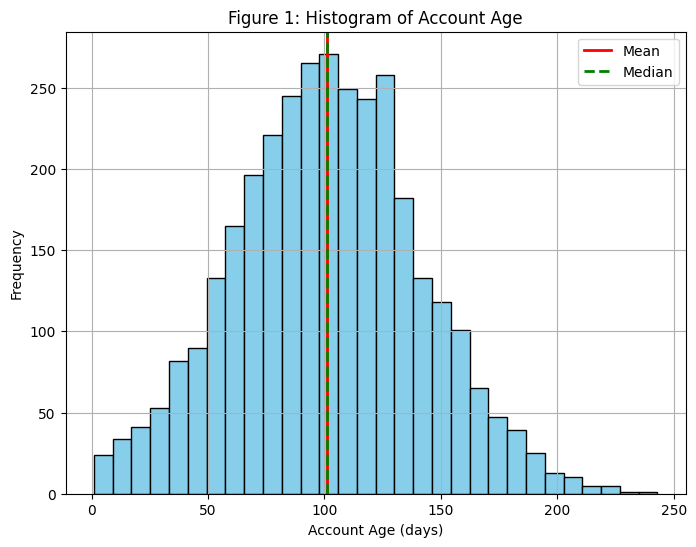

In [24]:
mean_account_age = df_churn['account_age'].mean()
median_account_age = df_churn['account_age'].median()
plt.figure(figsize=(8, 6))
plt.hist(df_churn['account_age'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_account_age, color='red', linestyle='-', linewidth=2, label='Mean')
plt.axvline(median_account_age, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Figure 1: Histogram of Account Age')
plt.xlabel('Account Age (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

#### Boxplot of Number of Service Calls

This boxplot shows that the number of customer service calls is heavily right-skewed with many outliers present according to the boxplot. Given the heavy skewness of the data, these outliers aren't extreme, and won't heavily impact the models, depending on which linear regression and artificial neural network models are selected. If models are selected which are not robust to outliers thern a transformation may be necessary. Note that this feature is discrete, so outliers have been jittered to make it clearer how many are present. 

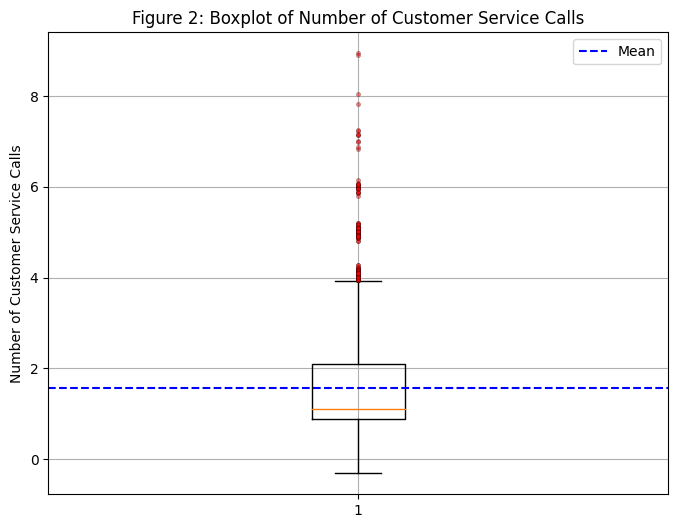

In [25]:
jitter = np.random.normal(loc=0, scale=0.1, size=len(df_churn['n_customer_service_calls']))
n_customer_service_calls_jittered = df_churn['n_customer_service_calls'] + jitter
outlier_marker = dict(markerfacecolor='red', marker='o', markersize=3, markeredgewidth=0.3, markeredgecolor='black', alpha=0.5)
mean_n_customer_service_calls = np.mean(df_churn['n_customer_service_calls'])

plt.figure(figsize=(8, 6))
plt.boxplot(n_customer_service_calls_jittered, flierprops=outlier_marker)
plt.axhline(y=mean_n_customer_service_calls, color='blue', linestyle='--', label='Mean')
plt.title('Figure 2: Boxplot of Number of Customer Service Calls')
plt.ylabel('Number of Customer Service Calls')
plt.legend()
plt.grid(True)
plt.show()

#### Bar plot of Churn

Figure 3 simply shows the breakdown of customers who have a voice mail plan (72%) compared to those who don't (28%).

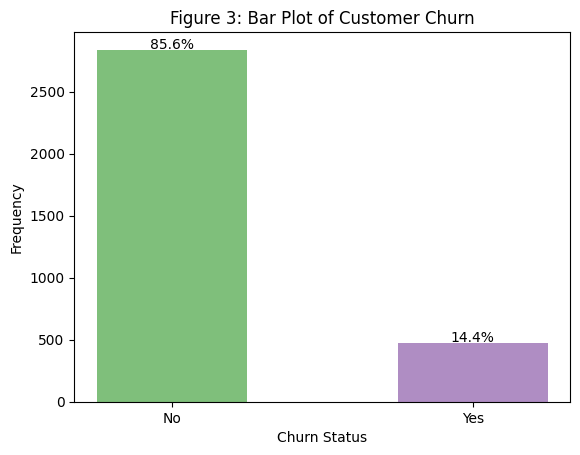

In [26]:
category_counts = df_churn['churn'].value_counts()
total_count = category_counts.sum()
category_percentages = category_counts / total_count * 100

plt.bar(category_counts.index, category_counts.values, color=['#7fbf7b', '#af8dc3'], width=0.5)
plt.xlabel('Churn Status')
plt.ylabel('Frequency')
plt.title('Figure 3: Bar Plot of Customer Churn')
plt.xticks([0, 1], ['No', 'Yes'])
#add percentage labels
for i, count in enumerate(category_counts):
    plt.text(i, count + 10, f"{category_percentages[i]:.1f}%", ha='center')

plt.show()

### Bivariate plots

#### Scatterplot of Age of Account vs Day Time Calls

I had a suspicion that there would be a correlation between these features, seeing as you would expect somebody who had had their account for longer to have made more calls. Figure 4 blows that suspicion out of the water, showing that the number of day calls must not be a cumulative value over the lifetime of an account, as there is little to no correlation. The lack of correlation likely make these features more valuable for modeling. 

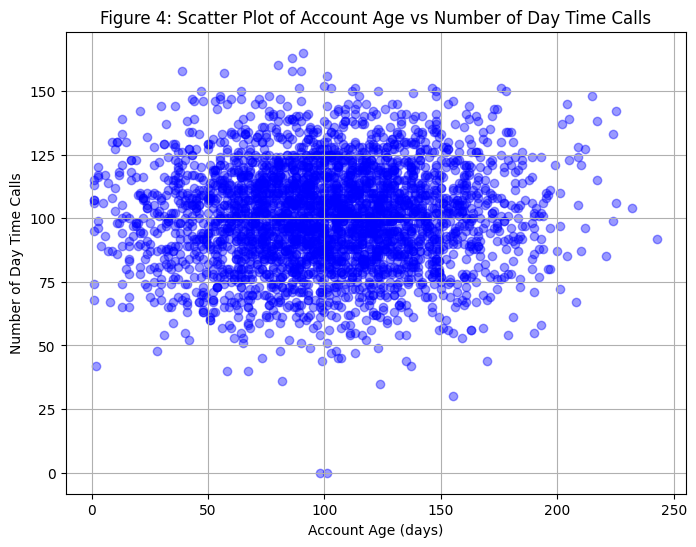

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df_churn['account_age'], df_churn['n_day_calls'], alpha=0.4, color = 'blue')
plt.title('Figure 4: Scatter Plot of Account Age vs Number of Day Time Calls')
plt.xlabel('Account Age (days)')
plt.ylabel('Number of Day Time Calls')
plt.grid(True)
plt.show()

#### Side by side Boxplots of Number of International Calls Vs International Plan

Interestingly, customers who do not have an international plan, have a very similar distribution of international calls to those customers who do have a plan. You might expect it to be costing them considerably more if they do not have an international plan. 

In [28]:
#number of customers with an international plan Vs 3315 total customers
df_churn['intl_plan'].sum()

321

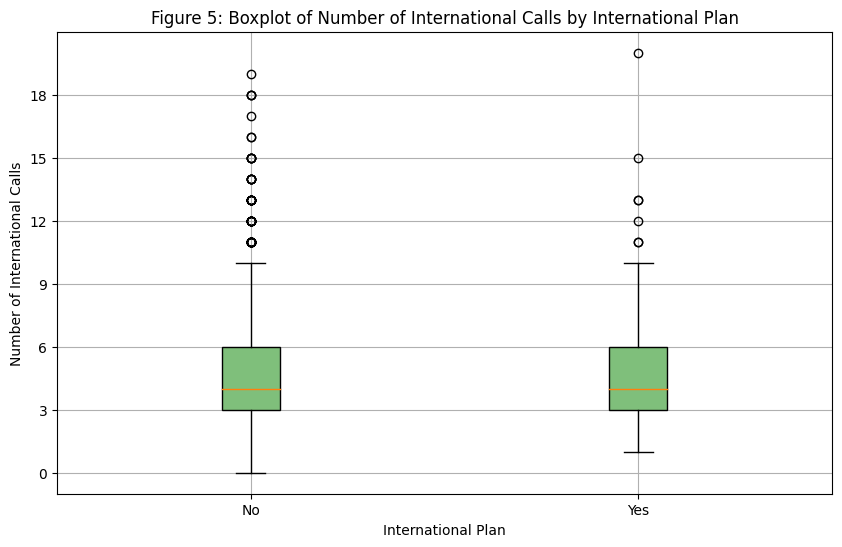

In [29]:
n_intl_calls_no = df_churn[df_churn['intl_plan'] == 0]['n_intl_calls']
n_intl_calls_yes = df_churn[df_churn['intl_plan'] == 1]['n_intl_calls']

plt.figure(figsize=(10, 6))
#create side-by-side boxplot
plt.boxplot([n_intl_calls_no, n_intl_calls_yes], labels=['No', 'Yes'], patch_artist=True, boxprops=dict(facecolor='#7fbf7b', edgecolor='black'))
plt.xlabel('International Plan')
plt.ylabel('Number of International Calls')
plt.title('Figure 5: Boxplot of Number of International Calls by International Plan')
plt.yticks(np.arange(0, max(df_churn['n_intl_calls'])+1, 3))
plt.grid(True)
plt.show()

#### Scatterplot of No. Day Calls Vs No. Night Calls

A reasonable theory might be that someone who makes more calls during the day is likely to also make more calls during the night. Figure 6 again disproves this theory, showing a lack of correlation between these features. 

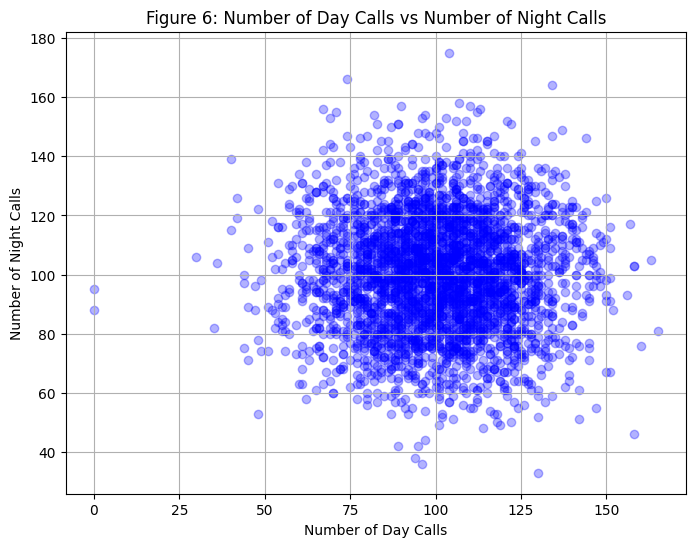

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df_churn['n_day_calls'], df_churn['n_night_calls'], alpha=0.3, color='blue')
plt.title('Figure 6: Number of Day Calls vs Number of Night Calls')
plt.xlabel('Number of Day Calls')
plt.ylabel('Number of Night Calls')
plt.grid(True)
plt.show()

#### Scatterplot of Evening Calls Vs Sum of Evening Charges

This time comparing number of calls with the corresponding sum of charges for phone calls made in the evening, again we see a very low correlation, with perhaps just a handful of outliers.

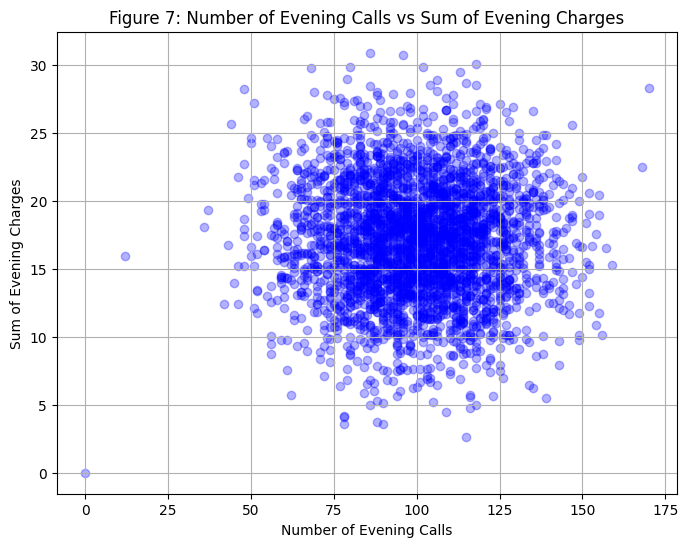

In [31]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(df_churn['n_evening_calls'], df_churn['sum_evening_charges'], alpha=0.3, color='blue')
plt.title('Figure 7: Number of Evening Calls vs Sum of Evening Charges')
plt.xlabel('Number of Evening Calls')
plt.ylabel('Sum of Evening Charges')
plt.grid(True)  # Add grid lines
plt.show()

### Multivariate plots

#### Scatterplot of Intl Calls Vs Intl Charges by Intl Plan

Following on with the analysis of international call by customers with and without international plans, Figure 8 shows that whether or not they have an international plan doesn't greatly impact their charges. The only trend which could be identified here is perhaps that customers with an international plan have a tighter range of charges than customers who don't, although we also need to remember that only roughly 10% of customers have international plans. 

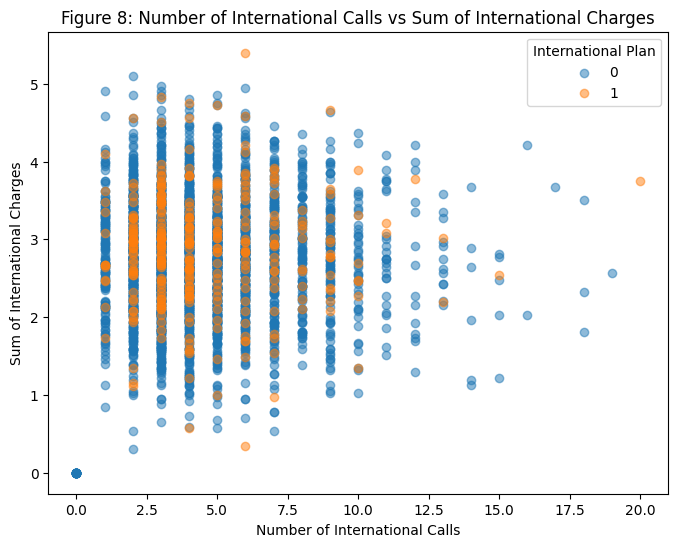

In [32]:
plt.figure(figsize=(8, 6))
#scatter plot with different colors for 'intl_plan'
for plan in df_churn['intl_plan'].unique():
    plt.scatter(df_churn[df_churn['intl_plan'] == plan]['n_intl_calls'], 
                df_churn[df_churn['intl_plan'] == plan]['sum_intl_charges'],
                label=plan, alpha=0.5)
plt.title('Figure 8: Number of International Calls vs Sum of International Charges')
plt.xlabel('Number of International Calls')
plt.ylabel('Sum of International Charges')
plt.legend(title='International Plan')
plt.show()

#### Stacked bar chart of No. Customers Vs No. Customer Service Calls by Churn

Figure 9 clearly portrays that although the number of customers declines as customer service calls increase, the percentage of those customers who churn increases, indicating that the number of customer service calls will be a very valuable metric for predicting churn. 

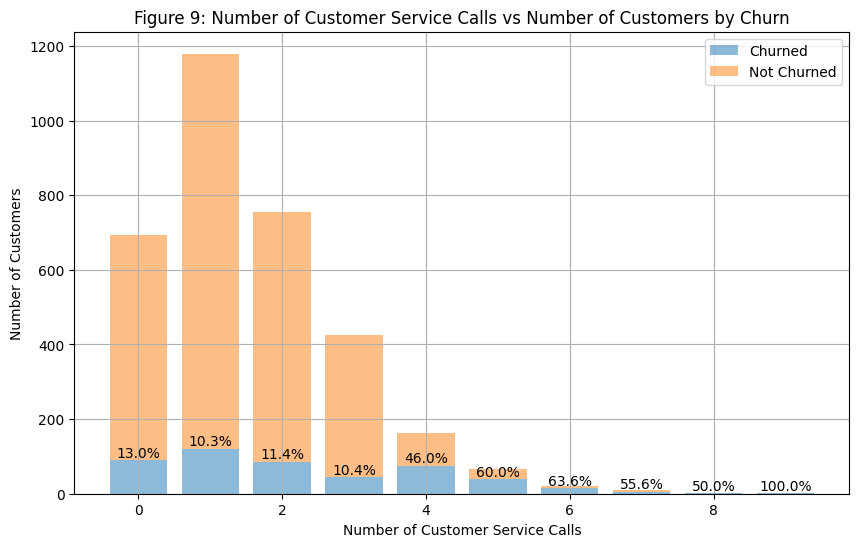

In [33]:
#group data by 'n_customer_service_calls' and 'churn', then count the number of occurrences
counts = df_churn.groupby(['n_customer_service_calls', 'churn']).size().unstack(fill_value=0)

#calculate percent of churn=1 for each value of 'n_customer_service_calls'
percent_churned = (counts[1] / (counts[1] + counts[0])) * 100

#collate unique values of 'n_customer_service_calls' and sort them
values = sorted(df_churn['n_customer_service_calls'].unique())

plt.figure(figsize=(10, 6))

#plot bars for True (churned) and False (not churned)
bars1 = plt.bar(values, counts[1], label='Churned', alpha=0.5)
bars2 = plt.bar(values, counts[0], bottom=counts[1], label='Not Churned', alpha=0.5)

#percentage labels for churn=1 on each bar
for bar, percentage in zip(bars1, percent_churned):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom', color='black')

plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Number of Customers')
plt.title('Figure 9: Number of Customer Service Calls vs Number of Customers by Churn')
plt.legend()
plt.grid(True)
plt.show()

#### Pairplot of 9 Numerical Features

Figure 10 is a good plot to scan many of the numerical features for correlations, but also gives an indication of feature distributions and which features correlate well with the target feature which has been used to control the colour of markers. It is quite evident from the various scatterplots that both sum of day charges and number of customer service calls contribute meaningfully to diffrerentiating churners from non churners. 

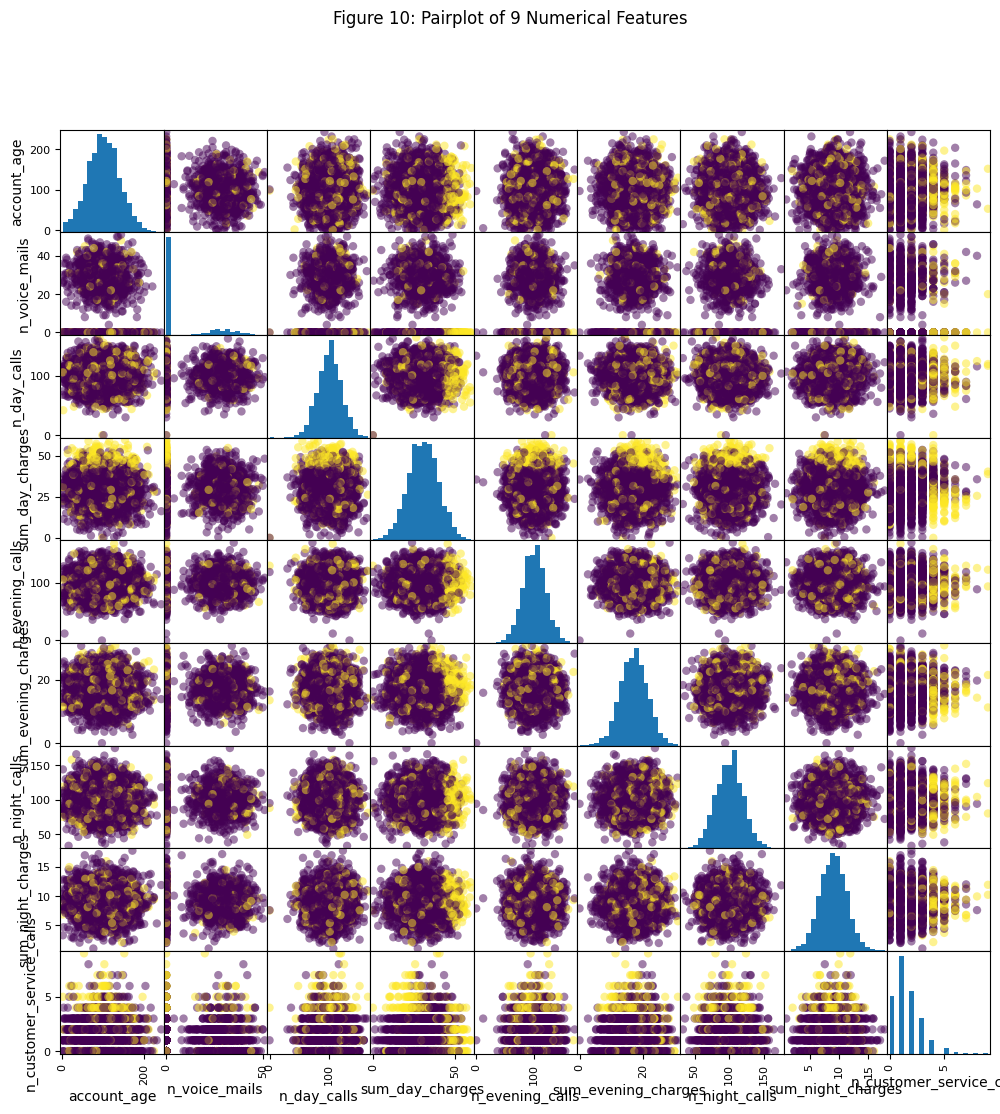

In [34]:
#create scatter matrix with necessary parameters
pd.plotting.scatter_matrix(df_churn[['account_age', 'n_voice_mails', 
                                     'n_day_calls', 'sum_day_charges', 
                                     'n_evening_calls', 'sum_evening_charges', 
                                     'n_night_calls', 'sum_night_charges', 
                                     'n_customer_service_calls']], 
                           c=df_churn['churn'], marker='o', 
                           hist_kwds={'bins': 20}, alpha=0.5, figsize=(12, 12))
plt.suptitle('Figure 10: Pairplot of 9 Numerical Features')
plt.show()

#### Scatterplot of Day Charges Vs No. Customer Service Calls by Churn

Given the apparent clustering of churn statuses on the corresponding plot in figure 10, it is worth a closer look. There is definitely some trends showing through here with a negative correlation for churners and positive correlation for non-churners. 

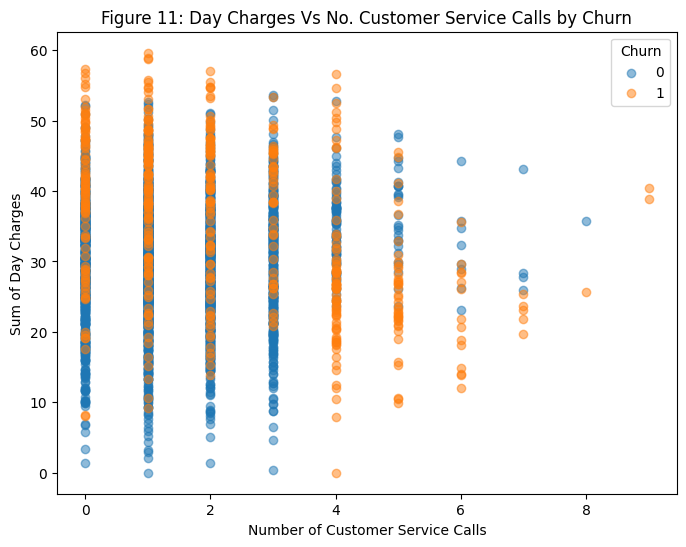

In [35]:
plt.figure(figsize=(8, 6))
#scatter plot with different colors for 'churn'
for churn_status in df_churn['churn'].unique():
    plt.scatter(df_churn[df_churn['churn'] == churn_status]['n_customer_service_calls'], 
                df_churn[df_churn['churn'] == churn_status]['sum_day_charges'],
                label=churn_status, alpha=0.5)
plt.title('Figure 11: Day Charges Vs No. Customer Service Calls by Churn')
plt.ylabel('Sum of Day Charges')
plt.xlabel('Number of Customer Service Calls')
plt.legend(title='Churn')
plt.show()

## Literature Review on Telecom Customer Churn Prediction using Machine Learning Approaches <a id='Literature-Review'></a>

### Introduction

Churn is defined as the percentage of customers who leave a particular service provider during a given year. If a customer can be identified as being at a high risk of churning, before they switch away from the service provider, retaining that customer, is comparatively cheaper (in some cases by 20x) than the cost to acquire a new customer (Ahmad et al., 2019) (Vafeiadis et al., 2015). Within the scientific community there has been much interest in developing machine learning models with the capability to predict telecom customers who will churn (Vafeiadis et al., 2015) with some successful ensemble models exceeding 99% accuracy, precision, and recall (Waghet et al., 2024). 

This literature review aims to summarise the learnings from consulting a broad range of published conference papers and journal articles relating to the use of machine learning to predict churn of telecom customers. Specifically, it aims to cover the topics of data preparation, feature selection, model selection, deep learning models, and model evaluation. 

Some papers consulted during the research for this review were excluded due to being outside the scope of this project, but ensemble learning (combining multiple individual models), adaptive learning (dynamic model adjustment), data transformation methods for combining data from multiple providers and data certainty are all aspects worthy of consideration when it comes to telecom customer churn prediction. 

### Methodology

When searching for applicable literature, many factors were considered to select the most appropriate publications including currency, citation count, relevance to the scope and objectives of this review and quality of methodology and results. Ultimately, four conference papers and fifteen journal articles were selected, seven of which were published within the last 12 months with some frequently cited papers dating back ten years. Most of the literature selected are centred around mobile telecom customer churn, whilst some highly regarded papers shed light on broader related topics and others were excluded as they cover topics beyond the scope of this project. One challenge encountered during the selection process was deciphering varied use of terminology, for example, machine learning models are frequently also described as data mining classification techniques (Keramati et al., 2014) and logit model refers to logistical regression (Coussement, Lessmann, & Verstraeten, 2017). 

### Review of Literature

#### 1. Data Preparation

The performance of churn prediction models can be significantly impacted by the quality of data preparation, with one study showing improvements of 14.5% in area under the curve and 34% in top decile lift because of data preparation treatment prior to the application of commonly used logistical regression models (Coussement et al., 2017). The paper proposes two steps to data preparation, firstly value transformation then value representation. It argues that best practise is to take independent variables and convert them into discrete variables to reduce unique data points, reduce complexity, increase scalability, retain classification performance and alleviate the handling of missing values. The process can be used on categorical variables using remapping or continuous variables via discretization. They then propose the use of one of three representation methods: dummy coding, weight-of-evidence conversion or incidence replacement (Coussement et al., 2017).

#### 2. Feature Selection

Feature selection is of top importance to the accuracy of predictions. Too many variables can negatively impact a model’s performance, so it is critical to reduce the number of inputted features to only those of most importance. One publicly available dataset from a 2009 competition to develop customer churn prediction models includes 15,000 variables, with others having more than 70 variables (Umayaparvathi, & Iyakutti, 2016). One of the conference papers reviewed (Wagh et al., 2024) summarised feature selection into 3 categories: the filter method scores features based on a statistical metric such as the chi-square statistic, and while efficient, ignores redundant features; the wrapper method, such as recursive feature elimination, considers inter-feature interaction but is prone to overfitting; finally, the imbedded method uses part of the model training such as via use of a random forest. Random forests are one popular method of choice which is also a commonly used model for customer churn prediction (Wagh et al., 2024)(Umayaparvathi, & Iyakutti, 2016), likewise Lasso regression is a common regression technique which can also be used for feature selection (Fujo, Subramanian, & Khder, 2022). 

#### 3. Model Selection

Based on the literature reviewed, there were many commonly used and highly accurate models for predicting customer churn. The most frequently tested models include linear regression (Vafeiadis et al., 2015)(Wagh et al., 2024)(Gaur, & Dubey, 2018)(Dalvi, Khandge, Deomore, Bankar, & Kanade, 2016)(Jain, Khunteta, & Srivastava, 2020)(Ele, Alo, Nweke, & Ofem, 2023)(Saha, Tripathy, Gaber, El-Gohary, & El-kenawy, 2023), decision trees (Vafeiadis et al., 2015)(Keramati et al., 2014)(Wagh et al., 2024)(Dalvi, et al., 2016)(Saha et al., 2023), artificial neural networks (Keramati et al., 2014)(Wagh et al., 2024)(Fujo, Subramanian, & Khder, 2022)(Saha et al., 2023) and random forests (Keramati et al., 2014)(Wagh et al., 2024)(Gaur, & Dubey, 2018)(Ullah et al., 2019). Some other common models include K-Nearest Neighbours (Keramati et al., 2014)(Wagh et al., 2024)(Saha et al., 2023), which in one case (Ullah et al., 2019) was used to categorise users after use of a random forest model, support vector machine (Vafeiadis et al., 2015)(Keramati et al., 2014)(Gaur, & Dubey, 2018) and Naïve Bayes (Vafeiadis et al., 2015)(Wagh et al., 2024). A conference paper published in March 2023 (Rabbah, Ridouani, & Hassouni, 2023) managed to achieve an accuracy of 81% using a model based on the transformers architecture, which has evolved rapidly over the last few years, but is unlikely to garner much attention with other models achieving closer to 90-99% accuracies (Coussement et al., 2017). Other noteworthy mentions are a very high performing convolutional neural network with accuracies of 98 and 99% on 2 datasets tested, alongside an equally well performing artificial neural network (Saha et al., 2023). Linear regression models generalise well to new datasets whilst avoiding high computation times, and an analysis of nine different regression models found Lasso Regression to be the most accurate with MAE and MSE values below 10% (Ele, Alo, Nweke, & Ofem, 2023).

#### 4. Model Evaluation

“A single aggregated measurement is insufficient to accurately reflect the performance of a machine learning algorithm” (Flach, 2019). The most common evaluation method used across the literature was to use precision, accuracy, recall and f1 scores (Vafeiadis et al., 2015), sometimes also supplemented with confusion matrices. AUC was also used in some studies, so it is worth clarifying that the correct evaluation metric will depend on the particular study: if classification of customers who will and will not churn are considered equally important, accuracy is a suitable measure; and F-score additionally assumes that correctly predicting a customer is unlikely to churn adds no incremental value; whereas AUC accounts for differing costs for mis-categorisation (Flach, 2019). 

### Selection of Machine Learning Models

Based on this review of literature applicable to the project scope, an appropriate selection of machine learning models to predict which customers of a telecommunication company are likely to churn could be an assortment of linear regression, decision tree, random forest, and artificial neural network models. Furthermore, considering the high value placed on preventing customer churn, and the drastically lower cost of preventing that churn compared with acquiring a new customer, accuracy, precision, recall and F1 score would be an appropriate metric on which to evaluate the models. 

### Conclusion

Customer churn is a significant metric for any telecommunication company which has a considerable impact on the lifetime value of their customer base, however machine learning models have the capability to predict which customers are likely to churn, allowing these companies to make targeted efforts to retain these customers. Using the models discussed in this literature review, the at-risk customers can be identified with very high accuracy, reaching in some cases up to 99%, which makes investigating and refining custom machine learning models for specific telecommunication companies a very valuable pursuit. 

## Summary and Conclusions

The ability to predict which customers will churn, before they do, gives telecommunication companies the ability to make extra efforts to retain those customers. Given that the cost to retain such customers is far cheaper than the cost to obtain new customers, an accurate model for identifying these customers is of great value a telco. This project aims to predict which customers will churn based on customer details available in the dataset provided by DataAnalytix, determine which model is best suited to this challenge, and in this phase of the project, clean, prep and explore the dataset in order to prepare for this challenge. 

During the cleaning of the data firstly, the phone number, area code and state columns were removed from the data in order to reduce noise as these features would not be useful in identifying churners, then columns were renamed for the sake of clarity and data types were adjusted so that the binary variables (internation plan, voicemail plan and churn) became integer values of 0 or 1. Next, missing values were identified and analysed, one missing value in the number of voicemails column was populated with 0 because that customer didn't have a voicemail plan, whilst the rest were removed as they only totalled 17 rows which is not significant compared to the total row count of 3333 customers. No inconsistencies were found, however after fixing the data types and exploring the correlations between variables, it was discovered that the voicemail plan column was redundant, and so it was removed. 

The single variable visualisations showed that account age has an extremely normal distribution, and the number of customer service calls is heavily right skewed with many outliers which will require some transformation if it is to be inputted into any model which is sensitive to outliers. The bi-variate plots showed that the distribution of number of international calls between people who do and do not have international plans, is extremely similar, whilst number of day calls compared to number of night calls, and number of evening calls compared to sum of evening charges, show no signs of correlation. When we digged deeper into international calls by comparing number of calls with sum of charges overlayed with whether the customer has an international plan, we discovered that those with an international had a tighter range of charges. Some other interesting trends discovered from multi-variate plots were that as number of service calls increases, the proportion of customers who are churners significantly increases and the sum of day charges is a strong indicator of who will churn, especially at the high end of charges. 

The skewness in customer service calls, correlation between voicemail plan and number of voicemails and signifiance of features including customer service calls and sum day call charges will no doubt prove to be very important findings from this initial stage of the project, which will set us up for success going into the second stage where we will use various models to predict churning customers. 

## References

Ahmad, A.K., Jafar, A. & Aljoumaa, K. Customer (2019) Churn prediction in telecom using machine learning in big data platform. *Big Data*, 6, 28. https://doi.org/10.1186/s40537-019-0191-6

Churnzero. (n.d.). Lifetime Value (LTV) or Customer Lifetime Value (CLV). Retrieved April 18, 2024, from https://churnzero.com/churnopedia/lifetime-value-ltv-or-customer-lifetime-value-cltv/

Coussement, K., Lessmann, S., & Verstraeten, G. (2017). A comparative analysis of data preparation algorithms for customer churn prediction: A case study in the telecommunication industry. *Decision Support Systems*, 95, 27-36. https://doi.org/10.1016/j.dss.2016.11.007

CrowdAnalytix. (2012). *Churn Prediction in Telecom: Reducing Customer Churn using Predictive Modeling.* Retrieved April 4, 2024, from https://www.crowdanalytix.com/contests/why-customer-churn/

Dalvi, P.K., Khandge, S.K., Deomore, A., Bankar, A., & Kanade, V.A. (2016). Analysis of customer churn prediction in telecom industry using decision trees and logistic regression. In Symposium on Colossal Data Analysis and Networking (CDAN), pp. 1-4. Indore, India. doi: 10.1109/CDAN.2016.7570883. https://doi.org/10.1109/CDAN.2016.7570883

De, S., P., P., & Paulose, J. (2021). Effective ML Techniques to Predict Customer Churn. In 2021 Third International Conference on Inventive Research in Computing Applications (ICIRCA), pp. 895-902. Coimbatore, India. doi: 10.1109/ICIRCA51532.2021.9544785. https://doi.org/10.1109/ICIRCA51532.2021.9544785

Ele, S.I., Alo, U.R., Nweke, H.F., & Ofem, O.A. (2023). Regression-Based Machine Learning Framework for Customer Churn Prediction in Telecommunication Industry. *Journal of Advances in Information Technology*, 14(5).

Flach, P. (2019). Performance Evaluation in Machine Learning: The Good, the Bad, the Ugly, and the Way Forward. In Proceedings of the AAAI Conference on Artificial Intelligence, 33(01), pp. 9808-9814. doi: 10.1609/aaai.v33i01.33019808. https://doi.org/10.1609/aaai.v33i01.33019808

Fujo, S.W., Subramanian, S., & Khder, M.A. (2022). Customer Churn Prediction in Telecommunication Industry Using Deep Learning. Volume 11 Issue 1 Jan. 2022. Retrieved from https://digitalcommons.aaru.edu.jo/cgi/viewcontent.cgi?article=1240&context=isl

Gaur, A., & Dubey, R. (2018). Predicting Customer Churn Prediction In Telecom Sector Using Various Machine Learning Techniques. In 2018 International Conference on Advanced Computation and Telecommunication (ICACAT), pp. 1-5. Bhopal, India. doi: 10.1109/ICACAT.2018.8933783. https://doi.org/10.1109/ICACAT.2018.8933783

Jain, H., Khunteta, A., & Srivastava, S. (2020). Churn Prediction in Telecommunication using Logistic Regression and Logit Boost. *Procedia Computer Science*, 167, 101-112. https://doi.org/10.1016/j.procs.2020.03.187

Keramati, A., Jafari-Marandi, R., Aliannejadi, M., Ahmadian, I., Mozaffari, M., & Abbasi, U. (2014). Improved churn prediction in telecommunication industry using data mining techniques. *Applied Soft Computing*, 24, 994-1012. https://doi.org/10.1016/j.asoc.2014.08.041

Kumar, N. (2019). *Telecom-Churn-Analysis-and-Prediction.* Retrieved April 4, 2024, from https://github.com/naveen-marthala/Telecom-Churn-Analysis-and-Prediction/blob/master/data/telecom%20churn(original_data).csv

Rabbah, J., Ridouani, M., & Hassouni, L. (2023). New Approach to Telecom Churn Prediction Based on Transformers. In A.E. Hassanien, et al. (Eds.), *The 3rd International Conference on Artificial Intelligence and Computer Vision (AICV2023)*, March 5–7, 2023 (Vol. 164, pp. 51). Springer, Cham. https://doi.org/10.1007/978-3-031-27762-7_51

Saha, L., Tripathy, H.K., Gaber, T., El-Gohary, H., & El-kenawy, E.-S.M. (2023). Deep Churn Prediction Method for Telecommunication Industry. *Sustainability,* 15, 4543. https://doi.org/10.3390/su15054543

Ullah, I., Raza, B., Malik, A.K., Imran, M., Islam, S.U., & Kim, S.W. (2019). A Churn Prediction Model Using Random Forest: Analysis of Machine Learning Techniques for Churn Prediction and Factor Identification in Telecom Sector. *IEEE Access,* 7, 60134-60149. doi: 10.1109/ACCESS.2019.2914999.

Umayaparvathi, V., & Iyakutti, K. (2016). A Survey on Customer Churn Prediction in Telecom Industry: Datasets, Methods and Metrics. *International Research Journal of Engineering and Technology (IRJET)*, 03(04), p. 1065-1070. ISSN: 2395-0072.

Vafeiadis, T., Diamantaras, K.I., Sarigiannidis, G., & Chatzisavvas, K.Ch. (2015). A comparison of machine learning techniques for customer churn prediction. *Simulation Modelling Practice and Theory,* 55, 1-9. https://doi.org/10.1016/j.simpat.2015.03.003.
     
Wagh, S.K., Andhale, A.A., Wagh, K.S., Pansare, J.R., Ambadekar, S.P., & Gawande, S.H. (2024). Customer churn prediction in telecom sector using machine learning techniques. *Results in Control and Optimization,* 14, 100342. https://doi.org/10.1016/j.rico.2023.100342.